# Stock Market (S&P 500) Sigma (standard deviation) Analysis


In [1]:
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git

#Get trendline equation
#https://stackoverflow.com/questions/49460596/add-trendline-with-equation-in-2d-array
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1738623308487.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Open,High,Low
0,01/31/2025,6040.53,6096.79,6120.91,6030.93
1,01/30/2025,6071.17,6050.75,6086.64,6027.46
2,01/29/2025,6039.31,6057.70,6062.83,6012.96
3,01/28/2025,6067.70,6026.97,6074.54,5994.63
4,01/27/2025,6012.28,5969.04,6017.17,5962.92
...,...,...,...,...,...
2517,02/09/2015,2046.74,2053.47,2056.16,2041.88
2518,02/06/2015,2055.47,2062.28,2072.40,2049.97
2519,02/05/2015,2062.52,2043.45,2063.55,2043.45
2520,02/04/2015,2041.51,2048.86,2054.74,2036.72


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2522.000000,2522.000000,2522.000000,2522.000000
mean,3384.401221,3378.178807,3396.055872,3358.932181
std,1102.662152,1114.635032,1120.186337,1108.866631
min,1829.080000,0.000000,0.000000,0.000000
25%,2440.435000,2442.410000,2450.480000,2431.152500
50%,3027.795000,3028.645000,3049.635000,3002.420000
75%,4229.780000,4233.605000,4264.577500,4205.430000
max,6118.710000,6121.430000,6128.180000,6088.740000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2515.000000,2515.000000,2515.000000,2515.000000
mean,3388.080322,3387.581292,3405.508115,3368.281097
std,1101.980130,1101.819531,1107.297999,1096.132550
min,1829.080000,1833.400000,1847.000000,1810.100000
25%,2444.140000,2444.800000,2454.365000,2435.970000
50%,3037.560000,3039.740000,3066.950000,3008.770000
75%,4235.230000,4234.310000,4267.705000,4209.105000
max,6118.710000,6121.430000,6128.180000,6088.740000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2515 entries, 0 to 2521
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2515 non-null   object 
 1   Close/Last  2515 non-null   float64
 2   Open        2515 non-null   float64
 3   High        2515 non-null   float64
 4   Low         2515 non-null   float64
dtypes: float64(4), object(1)
memory usage: 117.9+ KB


In [5]:
df.shape

(2515, 5)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

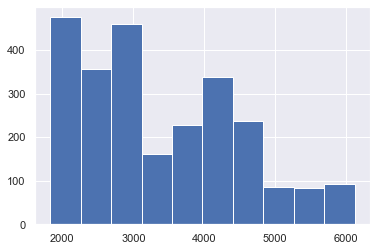

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

6040.53

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

3388.0803220675934

In [10]:
close_sd = df['Close/Last'].std()
close_sd

1101.9801301405928

In [11]:
sigma1 = close_mean + close_sd
sigma1

4490.060452208187

In [12]:
sigma2 = close_mean + (2 * close_sd)  #bubble (from trend) according to Grantham
sigma2

5592.040582348779

In [13]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble (from trend) according to Grantham
sigma2_5

6143.030647419076

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2515 entries, 0 to 2521
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2515 non-null   datetime64[ns]
 1   Close/Last  2515 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 58.9 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2015-02-03 to 2025-01-31')

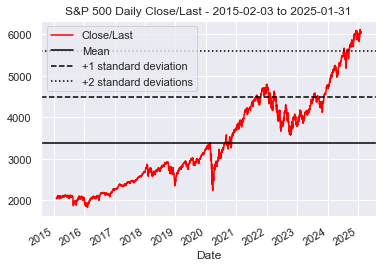

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2015-02-03 to 2025-01-31')

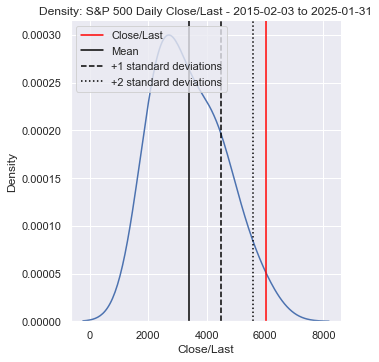

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html #kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_current, color=c, label='Close/Last')
plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

2.4069850312037855

In [19]:
# https://realpython.com/linear-regression-in-python/
#Step 4: Get results